In [627]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import sklearn.linear_model as linear_model
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import HTML, display, display_html
import numbers
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd
import numpy as n
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import pandas_profiling
#pip instal dfply
#import dfply
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import statsmodels.api as sm

import warnings

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, MinMaxScaler, scale
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

from functools import reduce

warnings.simplefilter(action='ignore')

import math as math
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint

In [503]:
test = pd.read_csv("/Users/utkarsh/Desktop/ML_GRP/Test.csv")
train_labels = pd.read_csv("/Users/utkarsh/Desktop/ML_GRP/Train_labels.csv")
train_values = pd.read_csv("/Users/utkarsh/Desktop/ML_GRP/Train_values.csv")
var_response = 'status_group'

In [504]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [505]:
train_labels.head()
train_labels.tail()

,id,status_group
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


In [506]:
train_values.head()
train_values.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [507]:
##### COMMENTING AS JOINING BOTH TRAIN AND TEST 


#train_values["status_group"] = train_labels["status_group"]

In [508]:
# Joining our train with the test
data = train_values.append(test)

In [509]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 40 columns):
id                       74250 non-null int64
amount_tsh               74250 non-null float64
date_recorded            74250 non-null object
funder                   69746 non-null object
gps_height               74250 non-null int64
installer                69718 non-null object
longitude                74250 non-null float64
latitude                 74250 non-null float64
wpt_name                 74250 non-null object
num_private              74250 non-null int64
basin                    74250 non-null object
subvillage               73780 non-null object
region                   74250 non-null object
region_code              74250 non-null int64
district_code            74250 non-null int64
lga                      74250 non-null object
ward                     74250 non-null object
population               74250 non-null int64
public_meeting           70095 non-null object
r

# EDA

In [510]:
#train_values.profile_report(style={'full_width':True})

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='water_quality',hue='status_group')
train.groupby('water_quality')['status_group'].value_counts() / train.groupby('water_quality')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='ward',hue='status_group')
train.groupby('ward')['status_group'].value_counts() / train.groupby('ward')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='waterpoint_type_group',hue='status_group')
train.groupby('waterpoint_type_group')['status_group'].value_counts() / train.groupby('waterpoint_type_group')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='waterpoint_type',hue='status_group')
train.groupby('waterpoint_type')['status_group'].value_counts() / train.groupby('waterpoint_type')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='source_class',hue='status_group')
train.groupby('source_class')['status_group'].value_counts() / train.groupby('source_class')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='source_type',hue='status_group')
train.groupby('source_type')['status_group'].value_counts() / train.groupby('source_type')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='source',hue='status_group')
train.groupby('source')['status_group'].value_counts() / train.groupby('source')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='quantity_group',hue='status_group')
train.groupby('quantity_group')['status_group'].value_counts() / train.groupby('quantity_group')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='quantity',hue='status_group')
train.groupby('quantity')['status_group'].value_counts() / train.groupby('quantity')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='payment_type',hue='status_group')
train.groupby('payment_type')['status_group'].value_counts() / train.groupby('payment_type')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='management',hue='status_group')
train.groupby('management')['status_group'].value_counts() / train.groupby('management')['status_group'].count(

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='extraction_type_class',hue='status_group')
train.groupby('extraction_type_class')['status_group'].value_counts() / train.groupby('extraction_type_class')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='extraction_type_group',hue='status_group')
train.groupby('extraction_type_group')['status_group'].value_counts() / train.groupby('extraction_type_group')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='extraction_type',hue='status_group')
train.groupby('extraction_type')['status_group'].value_counts() / train.groupby('extraction_type')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='construction_year',hue='status_group')
train.groupby('construction_year')['status_group'].value_counts() / train.groupby('construction_year')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='quantity',hue='status_group')
train.groupby('quantity')['status_group'].value_counts() / train.groupby('quantity')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='permit',hue='status_group')
train.groupby('permit')['status_group'].value_counts() / train.groupby('permit')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='scheme_management',hue='status_group')
train.groupby('scheme_management')['status_group'].value_counts() / train.groupby('scheme_management')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='recorded_by',hue='status_group')
train.groupby('recorded_by')['status_group'].value_counts() / train.groupby('recorded_by')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='waterpoint_type_group',hue='status_group')
train.groupby('waterpoint_type_group')['status_group'].value_counts() / train.groupby('waterpoint_type_group')['status_group'].count()

plt.figure(figsize=(24, 9))

sns.countplot(data=train,x='public_meeting',hue='status_group')
train.groupby('public_meeting')['status_group'].value_counts() / train.groupby('public_meeting')['status_group'].count()

# Data Cleaning

## Handling NaNs

### Imputing Missing Values

#### Population

In [511]:
data['population'].isna().sum()

0

In [512]:
data['population'] = data['population'].replace(0, np.nan)

In [513]:
data['population']

0         109.0
1         280.0
2         250.0
3          58.0
4           NaN
5           1.0
6           NaN
7           NaN
8           NaN
9           NaN
10        345.0
11        250.0
12          NaN
13          1.0
14          NaN
15        200.0
16         35.0
17         50.0
18       1000.0
19          1.0
20          4.0
21          NaN
22        350.0
23        210.0
24        156.0
25        140.0
26        260.0
27          NaN
28          1.0
29          1.0
          ...  
14820     749.0
14821      45.0
14822     360.0
14823       NaN
14824     250.0
14825      89.0
14826       NaN
14827       NaN
14828      70.0
14829      80.0
14830     150.0
14831       NaN
14832     260.0
14833       NaN
14834       NaN
14835       NaN
14836      40.0
14837     780.0
14838       NaN
14839     300.0
14840       NaN
14841       NaN
14842     230.0
14843    1400.0
14844       NaN
14845      20.0
14846    2960.0
14847     200.0
14848     150.0
14849      40.0
Name: population, Length

In [514]:
# confirm with Chris to replace by mean or median (as population is heavily skewed)

data['population'] = data['population'].transform(lambda x: x.fillna(x.median()))

In [515]:
data['population']

0         109.0
1         280.0
2         250.0
3          58.0
4         150.0
5           1.0
6         150.0
7         150.0
8         150.0
9         150.0
10        345.0
11        250.0
12        150.0
13          1.0
14        150.0
15        200.0
16         35.0
17         50.0
18       1000.0
19          1.0
20          4.0
21        150.0
22        350.0
23        210.0
24        156.0
25        140.0
26        260.0
27        150.0
28          1.0
29          1.0
          ...  
14820     749.0
14821      45.0
14822     360.0
14823     150.0
14824     250.0
14825      89.0
14826     150.0
14827     150.0
14828      70.0
14829      80.0
14830     150.0
14831     150.0
14832     260.0
14833     150.0
14834     150.0
14835     150.0
14836      40.0
14837     780.0
14838     150.0
14839     300.0
14840     150.0
14841     150.0
14842     230.0
14843    1400.0
14844     150.0
14845      20.0
14846    2960.0
14847     200.0
14848     150.0
14849      40.0
Name: population, Length

### Replacing NaNs by category "missing"

In [516]:
#As we cannot infer anything about the actual distribution insdie the missing values we decided to create a new category "missing"
#for the following columns
data["public_meeting"] = data["public_meeting"].replace(np.nan, "unknown")
data["permit"] = data["permit"].replace(np.nan, "unknown")
data['payment'] = data['payment'].fillna('unknown')
data['water_quality'] = data['water_quality'].fillna('unknown')
data['quantity'] = data['quantity'].fillna('unknown')
data['source'] = data['source'].fillna('unknown')
data['waterpoint_type'] = data['waterpoint_type'].fillna('unknown')
data['region'] = data['region'].fillna('unknown')

In [517]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 40 columns):
id                       74250 non-null int64
amount_tsh               74250 non-null float64
date_recorded            74250 non-null object
funder                   69746 non-null object
gps_height               74250 non-null int64
installer                69718 non-null object
longitude                74250 non-null float64
latitude                 74250 non-null float64
wpt_name                 74250 non-null object
num_private              74250 non-null int64
basin                    74250 non-null object
subvillage               73780 non-null object
region                   74250 non-null object
region_code              74250 non-null int64
district_code            74250 non-null int64
lga                      74250 non-null object
ward                     74250 non-null object
population               74250 non-null float64
public_meeting           74250 non-null object

## Changing Variable Datatypes

In [518]:
#train['district_code'] = train['district_code'].astype('category')
#train["date_recorded"] = pd.to_datetime(train["date_recorded"])

# REMOVING CONSTRUCTION YEAR FROM HERE AS REQD BELOW AS A NUMERIC TO CREATE THE VARIABLE AGE
data['date_recorded'] = pd.to_datetime(data['date_recorded']) #converting to date time

int_feature = ['region_code','district_code']
for col in int_feature:
    data[col] = data[col].astype('category')
    
    
#int_feature = ['region_code','construction_year','district_code']
#for col in int_feature:
#    data[col] = data[col].astype('category')

## Deleting Non-Informative and Duplicate Columns

In [519]:
data = data.drop(['payment_type'], axis=1)
data = data.drop(['quantity_group'],axis=1)
data = data.drop(['recorded_by'],axis=1)
data = data.drop(['num_private'],axis=1)
data = data.drop(['scheme_name'],axis=1)

## Reducing the amount of categories

### scheme_management

In [520]:
data["scheme_management"] = data['scheme_management'].str.lower()

In [521]:
# create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def scheme_wrangler(row):
    '''Keep the most concentrated values and set the rest to 'other' for scheme management '''
    if row['scheme_management']=='vwc':
        return 'vwc'
    elif row['scheme_management']=='wug':
        return 'wug'
    elif row['scheme_management']=='water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='wua':
        return 'wua'
    elif row['scheme_management']=='water board':
        return 'wtr_brd'
    elif row['scheme_management']=='tarastatal':
        return 'parastatal'
    elif row['scheme_management']=='company':
        return 'company'
    elif row['scheme_management']=='private operator':
        return 'private operator'
    else:
        return 'other'

data['scheme_management'] = data.apply(lambda row: scheme_wrangler(row), axis=1)

In [522]:
data.scheme_management.value_counts()

vwc                 45917
other                8182
wug                  6496
wtr_auth             3975
wua                  3551
wtr_brd              3462
company              1341
private operator     1326
Name: scheme_management, dtype: int64

### installer 

In [523]:
data["installer"] = data['installer'].str.lower()
def installer_wrangler(row):
    '''reducing the amount of categories of installer'''
    if row['installer']=='dwe':
        return 'dwe'
    elif row['installer']=='government':
        return 'gov'
    elif row['installer']=='rwe':
        return 'rwe'
    elif row['installer']=='commu':
        return 'commu'
    elif row['installer']=='danida':
        return 'danida'
    elif row['installer']=='kkkt':
        return 'kkkt'
    elif row['installer']=='hesawa':
        return 'hesawa'
    else:
        return 'other'  

data['installer'] = data.apply(lambda row: installer_wrangler(row), axis=1)

### funder 

In [524]:
data["funder"] = data['funder'].str.lower()
def funder_wrangler(row):
    '''reducing the amount of categories of installer'''
    if row['funder']=='government of tanzania':
        return 'government of tanzania'
    elif row['funder']=='danida':
        return 'danida'
    elif row['funder']=='hesawa':
        return 'hesawa'
    elif row['funder']=='rwssp':
        return 'rwssp'
    elif row['funder']=='world bank':
        return 'world bank'
    elif row['funder']=='kkkt':
        return 'kkkt'
    elif row['funder']=='world vision':
        return 'world vision'
    elif row['funder']=='unicef':
        return 'unicef'
    elif row['funder']=='tasaf':
        return 'tasaf'
    elif row['funder']=='district council':
        return 'government of tanzania'
    elif row['funder']=='dhv':
        return 'dhv'
    elif row['funder']=='private individual':
        return 'private individual'
    else:
        return 'other'  

data['funder'] = data.apply(lambda row: funder_wrangler(row), axis=1)

# Feature Engineering

## Season (Spring, Summer, Fall, Winter) of year

In [525]:
data['date_recorded_month'] = data['date_recorded'].dt.month
#https://seasonsyear.com/Tanzania
#spring: march, april, may
#summer: june, july, august
#fall: september, october, november
#winter: december, january, february


def season(row):
    '''get season of the year'''
    if row['date_recorded_month']==3:
        return 'spring'
    elif row['date_recorded_month']==4:
        return 'spring'
    elif row['date_recorded_month']==5:
        return 'spring'
    elif row['date_recorded_month']==6:
        return 'summer'
    elif row['date_recorded_month']==7:
        return 'summer'
    elif row['date_recorded_month']==8:
        return 'summer'
    elif row['date_recorded_month']==9:
        return 'fall'
    elif row['date_recorded_month']==10:
        return 'fall'
    elif row['date_recorded_month']==11:
        return 'fall'
    elif row['date_recorded_month']==12:
        return 'winter'
    elif row['date_recorded_month']==1:
        return 'winter'
    elif row['date_recorded_month']==2:
        return 'winter'
    else:
        return 'other'  

data['season'] = data.apply(lambda row: season(row), axis=1)

## Rain or dry season

In [526]:
#https://www.expertafrica.com/tanzania/weather-and-climate/graphs
#strong rainfall in tansania: march, april, may, november, december

def rain_dry(row):
    '''get if rain or dry season of the year'''
    if row['date_recorded_month']==3:
        return 'rain_season'
    elif row['date_recorded_month']==4:
        return 'rain_season'
    elif row['date_recorded_month']==5:
        return 'rain_season'
    elif row['date_recorded_month']==6:
        return 'dry_season'
    elif row['date_recorded_month']==7:
        return 'dry_season'
    elif row['date_recorded_month']==8:
        return 'dry_season'
    elif row['date_recorded_month']==9:
        return 'dry_season'
    elif row['date_recorded_month']==10:
        return 'dry_season'
    elif row['date_recorded_month']==11:
        return 'rain_season'
    elif row['date_recorded_month']==12:
        return 'rain_season'
    elif row['date_recorded_month']==1:
        return 'dry_season'
    elif row['date_recorded_month']==2:
        return 'dry_season'
    else:
        return 'other'  

data['rain_dry'] = data.apply(lambda row: rain_dry(row), axis=1)

## Time which has passed since the well has been checked

In [527]:
#data['date_recorded'] = pd.to_datetime(data['date_recorded']) no need done earlier
data['date_recorded_year'] = data['date_recorded'].dt.year

data['age'] = data['date_recorded_year'] - data['construction_year'] #bin, same procedure as for the original construction year


## How many people consume water from the same well

In [528]:
data['water_per_person'] = data['amount_tsh'] / data['population']   

## Is the basin a river or lake

In [529]:
#basin = lake or river
def lake_river(row):
    '''Extract if source of basin is lake or river'''
    if row['basin']=='Lake Victoria':
        return 'lake'
    elif row['basin']=='Pangani':
        return 'river'
    elif row['basin']=='Rufiji':
        return 'river'
    elif row['basin']=='Lake Tanganyika':
        return 'lake'
    elif row['basin']=='Wami / Ruvu':
        return 'river'
    elif row['basin']=='Lake Nyasa':
        return 'lake'
    elif row['basin']=='Ruvuma / Southern Coast':
        return 'lake'
    else:
        return 'other'  

data['lake_river_other'] = data.apply(lambda row: lake_river(row), axis=1)

## Is the waterpump located in a rural or urban area

In [530]:
data["lga"] = data['lga'].str.lower()

In [531]:
def lga_split(row):
    if " rural" in row["lga"]:
        return "rural"
    elif " urban" in row["lga"]:
        return "urban"
    else:
        return "other"

In [532]:
data['rural_urban'] = data.apply(lambda row: lga_split(row), axis=1)

## Is the waterpump located in a school

In [533]:
data["wpt_name"] = data['wpt_name'].str.lower()

In [534]:
def school_split(row):
    if "shuleni" in row["wpt_name"]:
        return "school"
    elif "school" in row["wpt_name"]:
        return "school"
    elif "sekondari" in row["wpt_name"]:
        return "school"
    elif "secondary" in row["wpt_name"]:
        return "school"
    elif "primary" in row["wpt_name"]:
        return "school"
    elif "primari" in row["wpt_name"]:
        return "school"
    elif "shule" in row["wpt_name"]:
        return "school"
    elif "scho" in row["wpt_name"]:
        return "school"
    else:
        return "other"

In [535]:
data['school'] = data.apply(lambda row: school_split(row), axis=1)

## Is the waterpump located in an area prone to floods

In [536]:
#High chance of floods
#https://www.researchgate.net/figure/Regions-in-Tanzania-affected-by-flood-events-1964-2014_fig1_282858615
#Mbeya, Arusha, Pwani,  Morogoro, Mwanza, Singyanga, Dodoma, Tanga

In [537]:
def flood_risk(row):
    if "Mbeya" in row["region"]:
        return "high"
    elif "Arusha" in row["region"]:
        return "high"
    elif "Pwani" in row["region"]:
        return "high"
    elif "Morogoro" in row["region"]:
        return "high"
    elif "Mwanza" in row["region"]:
        return "high"
    elif "Singyanga" in row["region"]:
        return "high"
    elif "Dodoma" in row["region"]:
        return "high"
    elif "Tanga" in row["region"]:
        return "high"
    else:
        return "not_high"

In [538]:
data['flood_risk'] = data.apply(lambda row: flood_risk(row), axis=1)

# EDA Doublecheck

In [539]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 45 columns):
id                       74250 non-null int64
amount_tsh               74250 non-null float64
date_recorded            74250 non-null datetime64[ns]
funder                   74250 non-null object
gps_height               74250 non-null int64
installer                74250 non-null object
longitude                74250 non-null float64
latitude                 74250 non-null float64
wpt_name                 74250 non-null object
basin                    74250 non-null object
subvillage               73780 non-null object
region                   74250 non-null object
region_code              74250 non-null category
district_code            74250 non-null category
lga                      74250 non-null object
ward                     74250 non-null object
population               74250 non-null float64
public_meeting           74250 non-null object
scheme_management        74250 

In [540]:
# COMMENTED takes a lot of time to run (move it before ML)
#data.profile_report(style={'full_width':True}) 

# Scaling and Binning Numerical Values

## amount_tsh

In [541]:
data["amount_tsh_scaled"] = minmax_scale(data['amount_tsh'], feature_range=(0,1))

In [542]:
 #binning temp, atemp, hum in 5 equally sized bins
bins =  [0.000000000001, 0.19, 0.39, 0.59, 0.79, 1]
data['amount_tsh_binned'] = pd.cut(data['amount_tsh_scaled'], bins).astype('category')
data['amount_tsh_binned'] = data['amount_tsh_binned'].replace(np.nan, 'unknown').astype('category')

## population

In [543]:
data["population_scaled"] = minmax_scale(data['population'], feature_range=(0,1))

In [544]:
 #binning temp, atemp, hum in 5 equally sized bins
bins =  [0.000000000001, 0.19, 0.39, 0.59, 0.79, 1]
data['population_binned'] = pd.cut(data['population_scaled'], bins).astype('category')
data['population_binned'] = data['population_binned'].replace(np.nan, 'pop=1').astype('category')

In [545]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,age,water_per_person,lake_river_other,rural_urban,school,flood_risk,amount_tsh_scaled,amount_tsh_binned,population_scaled,population_binned
0,69572,6000.0,2011-03-14,other,1390,other,34.938093,-9.856322,none,Lake Nyasa,...,12,55.045872,lake,other,other,not_high,0.017143,"(1e-12, 0.19]",0.003541,"(1e-12, 0.19]"
1,8776,0.0,2013-03-06,other,1399,other,34.698766,-2.147466,zahanati,Lake Victoria,...,3,0.000000,lake,other,other,not_high,0.000000,unknown,0.009148,"(1e-12, 0.19]"
2,34310,25.0,2013-02-25,other,686,other,37.460664,-3.821329,kwa mahundi,Pangani,...,4,0.100000,river,other,other,not_high,0.000071,"(1e-12, 0.19]",0.008164,"(1e-12, 0.19]"
3,67743,0.0,2013-01-28,unicef,263,other,38.486161,-11.155298,zahanati ya nanyumbu,Ruvuma / Southern Coast,...,27,0.000000,lake,other,other,not_high,0.000000,unknown,0.001869,"(1e-12, 0.19]"
4,19728,0.0,2011-07-13,other,0,other,31.130847,-1.825359,shuleni,Lake Victoria,...,2011,0.000000,lake,other,school,not_high,0.000000,unknown,0.004885,"(1e-12, 0.19]"


## gps_height

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 49 columns):
id                       74250 non-null int64
amount_tsh               74250 non-null float64
date_recorded            74250 non-null datetime64[ns]
funder                   74250 non-null object
gps_height               74250 non-null int64
installer                74250 non-null object
longitude                74250 non-null float64
latitude                 74250 non-null float64
wpt_name                 74250 non-null object
basin                    74250 non-null object
subvillage               73780 non-null object
region                   74250 non-null object
region_code              74250 non-null category
district_code            74250 non-null category
lga                      74250 non-null object
ward                     74250 non-null object
population               74250 non-null float64
public_meeting           74250 non-null object
scheme_management        74250 

In [547]:
data2 = pd.concat([train_values,test], ignore_index=True)

data2['gps_height'] = data2['gps_height'].replace(0, np.nan)
#data.info()
import math as math
Subvillage = data2.groupby(["subvillage"])["gps_height"].agg(["mean", "median"])
Subvillage.head(10)

data2.loc[data2["gps_height"].isnull(), "gps_height"] = data2.groupby(["subvillage"])["gps_height"].transform("mean")
data2.loc[data2["gps_height"].isnull(), "gps_height"] = data2.groupby(["ward"])["gps_height"].transform("mean")
data2.loc[data2["gps_height"].isnull(), "gps_height"] = data2.groupby(["lga"])["gps_height"].transform("mean")
data2.loc[data2["gps_height"].isnull(), "gps_height"] = data2.groupby(["district_code"])["gps_height"].transform("mean")

# If we want to use the median:

#data.loc[data["gps_height"].isnull(), "gps_height"] = data.groupby(["subvillage"])["gps_height"].transform("median")
#data.loc[data["gps_height"].isnull(), "gps_height"] = data.groupby(["ward"])["gps_height"].transform("median")
#data.loc[data["gps_height"].isnull(), "gps_height"] = data.groupby(["lga"])["gps_height"].transform("median")
#data.loc[data["gps_height"].isnull(), "gps_height"] = data.groupby(["district_code"])["gps_height"].transform("median")


#data.info()

In [548]:
data2['longitude'] = data2['longitude'].replace(0, np.nan)
#data.info()

data2.loc[data2["longitude"].isnull(), "longitude"] = data2.groupby(["subvillage"])["longitude"].transform("mean")
data2.loc[data2["longitude"].isnull(), "longitude"] = data2.groupby(["ward"])["longitude"].transform("mean")
data2.loc[data2["longitude"].isnull(), "longitude"] = data2.groupby(["lga"])["longitude"].transform("mean")
data2.loc[data2["longitude"].isnull(), "longitude"] = data2.groupby(["district_code"])["longitude"].transform("mean")
#data2.info()

# If we want to use the median:

#data.loc[data["longitude"].isnull(), "longitude"] = data.groupby(["subvillage"])["longitude"].transform("median")
#data.loc[data["longitude"].isnull(), "longitude"] = data.groupby(["ward"])["longitude"].transform("median")
#data.loc[data["longitude"].isnull(), "longitude"] = data.groupby(["lga"])["longitude"].transform("median")
#data.loc[data["longitude"].isnull(), "longitude"] = data.groupby(["district_code"])["longitude"].transform("median")

# There are no zeros on latitude 
data2['latitude'] = data2['latitude'].replace(0, np.nan)
#data.info()

In [549]:
data["gps_height"] = data2['gps_height']
data['longitude'] = data2['longitude']

In [550]:
data["gps_height_scaled"] = minmax_scale(data['gps_height'], feature_range=(0,1))

In [551]:
 #binning temp, atemp, hum in 5 equally sized bins
bins =  [0.00000, 0.19, 0.39, 0.59, 0.79, 1]
data['gps_height_binned'] = pd.cut(data['gps_height_scaled'], bins).astype('category')
#train['gps_height_binned'] = train['gps_height_binned'].replace(np.nan, 'pop=1').astype('category')

In [552]:
data['gps_height_binned']

0        (0.39, 0.59]
1        (0.39, 0.59]
2        (0.19, 0.39]
3         (0.0, 0.19]
4        (0.39, 0.59]
5        (0.19, 0.39]
6        (0.19, 0.39]
7        (0.19, 0.39]
8         (0.0, 0.19]
9        (0.19, 0.39]
10        (0.0, 0.19]
11       (0.39, 0.59]
12       (0.19, 0.39]
13       (0.39, 0.59]
14       (0.39, 0.59]
15       (0.59, 0.79]
16       (0.59, 0.79]
17       (0.59, 0.79]
18       (0.39, 0.59]
19       (0.59, 0.79]
20        (0.79, 1.0]
21       (0.39, 0.59]
22       (0.39, 0.59]
23       (0.19, 0.39]
24       (0.59, 0.79]
25       (0.39, 0.59]
26        (0.0, 0.19]
27        (0.0, 0.19]
28       (0.39, 0.59]
29       (0.39, 0.59]
             ...     
14820    (0.39, 0.59]
14821    (0.39, 0.59]
14822    (0.19, 0.39]
14823    (0.39, 0.59]
14824    (0.19, 0.39]
14825     (0.0, 0.19]
14826    (0.39, 0.59]
14827    (0.39, 0.59]
14828     (0.0, 0.19]
14829    (0.59, 0.79]
14830    (0.19, 0.39]
14831    (0.19, 0.39]
14832    (0.39, 0.59]
14833    (0.19, 0.39]
14834    (

# Age

In [553]:
data["age"].head(20)

0       12
1        3
2        4
3       27
4     2011
5        2
6     2012
7     2012
8     2012
9     2011
10       0
11      26
12    2012
13       4
14    2012
15      20
16      33
17      33
18      12
19      19
Name: age, dtype: int64

In [554]:
data["age_clipped"] = data['age'].replace(0, 0.001)

In [555]:
data["age_clipped"].head(15)

0       12.000
1        3.000
2        4.000
3       27.000
4     2011.000
5        2.000
6     2012.000
7     2012.000
8     2012.000
9     2011.000
10       0.001
11      26.000
12    2012.000
13       4.000
14    2012.000
Name: age_clipped, dtype: float64

In [556]:
data["age_clipped"] = np.clip(data["age_clipped"], 0, 500)

In [557]:
data["age_clipped"].head(15)

0      12.000
1       3.000
2       4.000
3      27.000
4     500.000
5       2.000
6     500.000
7     500.000
8     500.000
9     500.000
10      0.001
11     26.000
12    500.000
13      4.000
14    500.000
Name: age_clipped, dtype: float64

In [558]:
data["age_clipped"] = data['age_clipped'].replace(500, 0)

In [559]:
data["age_clipped"].head(20)

0     12.000
1      3.000
2      4.000
3     27.000
4      0.000
5      2.000
6      0.000
7      0.000
8      0.000
9      0.000
10     0.001
11    26.000
12     0.000
13     4.000
14     0.000
15    20.000
16    33.000
17    33.000
18    12.000
19    19.000
Name: age_clipped, dtype: float64

In [560]:
data["age_clipped_scaled"] = minmax_scale(data['age_clipped'], feature_range=(0,1))

In [561]:
data["age_clipped_scaled"].head(20)

0     0.226415
1     0.056604
2     0.075472
3     0.509434
4     0.000000
5     0.037736
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000019
11    0.490566
12    0.000000
13    0.075472
14    0.000000
15    0.377358
16    0.622642
17    0.622642
18    0.226415
19    0.358491
Name: age_clipped_scaled, dtype: float64

In [562]:
bins =  [0.000000000001, 0.19, 0.39, 0.59, 0.79, 1]
data['age_clipped_binned'] = pd.cut(data['age_clipped_scaled'], bins).astype('category')
data['age_clipped_binned'] = data['age_clipped_binned'].replace(np.nan, 'unknown').astype('category')

In [563]:
data['age_clipped_binned']

0         (0.19, 0.39]
1        (1e-12, 0.19]
2        (1e-12, 0.19]
3         (0.39, 0.59]
4              unknown
5        (1e-12, 0.19]
6              unknown
7              unknown
8              unknown
9              unknown
10       (1e-12, 0.19]
11        (0.39, 0.59]
12             unknown
13       (1e-12, 0.19]
14             unknown
15        (0.19, 0.39]
16        (0.59, 0.79]
17        (0.59, 0.79]
18        (0.19, 0.39]
19        (0.19, 0.39]
20       (1e-12, 0.19]
21             unknown
22        (0.59, 0.79]
23       (1e-12, 0.19]
24       (1e-12, 0.19]
25        (0.59, 0.79]
26       (1e-12, 0.19]
27             unknown
28        (0.19, 0.39]
29        (0.19, 0.39]
             ...      
14820     (0.19, 0.39]
14821    (1e-12, 0.19]
14822     (0.19, 0.39]
14823          unknown
14824    (1e-12, 0.19]
14825     (0.59, 0.79]
14826          unknown
14827          unknown
14828          unknown
14829    (1e-12, 0.19]
14830     (0.19, 0.39]
14831          unknown
14832     (

## Construction Year

In [564]:
bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
data['construction_year_binned'] = pd.cut(data['construction_year'], bins).astype('category')

In [565]:
data['construction_year_binned'] = data['construction_year_binned'].replace(np.nan, 'unknown').astype('category')

In [566]:
data['construction_year_binned']

0        (1990.0, 2000.0]
1        (2000.0, 2010.0]
2        (2000.0, 2010.0]
3        (1980.0, 1990.0]
4                 unknown
5        (2000.0, 2010.0]
6                 unknown
7                 unknown
8                 unknown
9                 unknown
10       (2010.0, 2020.0]
11       (1980.0, 1990.0]
12                unknown
13       (2000.0, 2010.0]
14                unknown
15       (1990.0, 2000.0]
16       (1970.0, 1980.0]
17       (1970.0, 1980.0]
18       (1990.0, 2000.0]
19       (1990.0, 2000.0]
20       (2000.0, 2010.0]
21                unknown
22       (1970.0, 1980.0]
23       (2010.0, 2020.0]
24       (2000.0, 2010.0]
25       (1970.0, 1980.0]
26       (2010.0, 2020.0]
27                unknown
28       (1990.0, 2000.0]
29       (2000.0, 2010.0]
               ...       
14820    (2000.0, 2010.0]
14821    (2000.0, 2010.0]
14822    (1990.0, 2000.0]
14823             unknown
14824    (2000.0, 2010.0]
14825    (1970.0, 1980.0]
14826             unknown
14827       

## Water per Person

In [567]:
data["water_per_person_scaled"] = minmax_scale(data['water_per_person'], feature_range=(0,1))

In [568]:
#binning temp, atemp, hum in 5 equally sized bins
bins = [0.000000000001, 0.19, 0.39, 0.59, 0.79, 1]
data['water_per_person_binned'] = pd.cut(data['water_per_person_scaled'], bins).astype('category')
data['water_per_person_binned'] = data['water_per_person_binned'].replace(np.nan, 'unknown').astype('category')

In [569]:
data["water_per_person_binned"]

0        (1e-12, 0.19]
1              unknown
2        (1e-12, 0.19]
3              unknown
4              unknown
5        (1e-12, 0.19]
6              unknown
7              unknown
8              unknown
9              unknown
10             unknown
11       (1e-12, 0.19]
12             unknown
13             unknown
14             unknown
15             unknown
16       (1e-12, 0.19]
17             unknown
18             unknown
19       (1e-12, 0.19]
20       (1e-12, 0.19]
21             unknown
22             unknown
23       (1e-12, 0.19]
24             unknown
25             unknown
26       (1e-12, 0.19]
27             unknown
28             unknown
29             unknown
             ...      
14820          unknown
14821    (1e-12, 0.19]
14822    (1e-12, 0.19]
14823          unknown
14824          unknown
14825          unknown
14826          unknown
14827          unknown
14828    (1e-12, 0.19]
14829          unknown
14830          unknown
14831          unknown
14832      

# Splitting the dataset to remove outlier from train data set


In [570]:
train = data.iloc[0:59399]
test = data.iloc[59400:74250]

## Deleting Outliers

### Population

In [571]:
train["status_group"] = train_labels["status_group"]

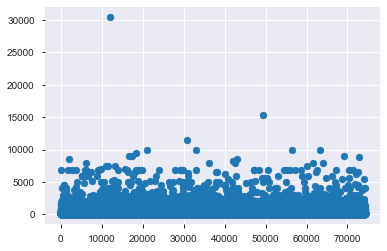

In [572]:
matplotlib.pyplot.scatter(train["id"], train["population"])

In [573]:
train.loc[train["population"] > 2000].count()

id                          482
amount_tsh                  482
date_recorded               482
funder                      482
gps_height                  482
installer                   482
longitude                   482
latitude                    482
wpt_name                    482
basin                       482
subvillage                  482
region                      482
region_code                 482
district_code               482
lga                         482
ward                        482
population                  482
public_meeting              482
scheme_management           482
permit                      482
construction_year           482
extraction_type             482
extraction_type_group       482
extraction_type_class       482
management                  482
management_group            482
payment                     482
water_quality               482
quality_group               482
quantity                    482
source                      482
source_t

In [574]:
train = train[train["population"] < 2000]

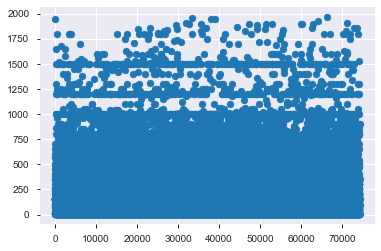

In [575]:
#double-checking the distribution after removing outliers
matplotlib.pyplot.scatter(train["id"], train["population"])

### Amount_tsh

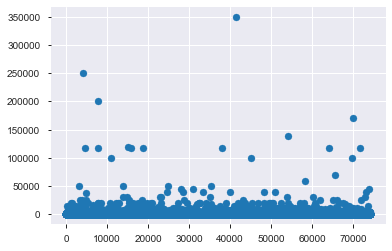

In [576]:
matplotlib.pyplot.scatter(train["id"], train["amount_tsh"])

In [577]:
train.loc[train["amount_tsh"] > 5000].count()

id                          467
amount_tsh                  467
date_recorded               467
funder                      467
gps_height                  467
installer                   467
longitude                   467
latitude                    467
wpt_name                    467
basin                       467
subvillage                  467
region                      467
region_code                 467
district_code               467
lga                         467
ward                        467
population                  467
public_meeting              467
scheme_management           467
permit                      467
construction_year           467
extraction_type             467
extraction_type_group       467
extraction_type_class       467
management                  467
management_group            467
payment                     467
water_quality               467
quality_group               467
quantity                    467
source                      467
source_t

In [578]:
train = train[train["amount_tsh"] < 5000]

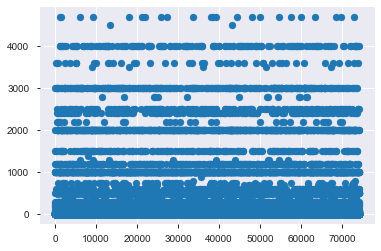

In [579]:
#double-checking the distribution after removing outliers
matplotlib.pyplot.scatter(train["id"], train["amount_tsh"])

In [580]:
train.shape

(57874, 58)

In [597]:
data = train.append(test)

In [598]:
data['gps_height_binned'] = data['gps_height_binned'].replace(np.nan, '(0.19, 0.39]')

In [599]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72724 entries, 1 to 14849
Data columns (total 58 columns):
age                         72724 non-null int64
age_clipped                 72724 non-null float64
age_clipped_binned          72724 non-null category
age_clipped_scaled          72724 non-null float64
amount_tsh                  72724 non-null float64
amount_tsh_binned           72724 non-null category
amount_tsh_scaled           72724 non-null float64
basin                       72724 non-null object
construction_year           72724 non-null int64
construction_year_binned    72724 non-null category
date_recorded               72724 non-null datetime64[ns]
date_recorded_month         72724 non-null int64
date_recorded_year          72724 non-null int64
district_code               72724 non-null category
extraction_type             72724 non-null object
extraction_type_class       72724 non-null object
extraction_type_group       72724 non-null object
flood_risk               

In [600]:
#hour = hour.drop(columns = ['hr2','season2', 'temp2', 'hum2', 'weekday2'])
data = data.drop(columns = ['subvillage','construction_year','wpt_name','lga','management','status_group','date_recorded'])

In [601]:
data_dummy = pd.get_dummies(data)

In [586]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72724 entries, 1 to 14849
Columns: 2378 entries, age to waterpoint_type_group_other
dtypes: datetime64[ns](1), float64(12), int64(4), uint8(2361)
memory usage: 173.7 MB


# finally start with machine learning

In [587]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,population_binned,gps_height_scaled,gps_height_binned,age_clipped,age_clipped_scaled,age_clipped_binned,construction_year_binned,water_per_person_scaled,water_per_person_binned,status_group
1,8776,0.0,2013-03-06,other,1399.000000,other,34.698766,-2.147466,zahanati,Lake Victoria,...,"(1e-12, 0.19]",0.520629,"(0.39, 0.59]",3.0,0.056604,"(1e-12, 0.19]","(2000.0, 2010.0]",0.000000,unknown,functional
2,34310,25.0,2013-02-25,other,686.000000,other,37.460664,-3.821329,kwa mahundi,Pangani,...,"(1e-12, 0.19]",0.271329,"(0.19, 0.39]",4.0,0.075472,"(1e-12, 0.19]","(2000.0, 2010.0]",0.000003,"(1e-12, 0.19]",functional
3,67743,0.0,2013-01-28,unicef,263.000000,other,38.486161,-11.155298,zahanati ya nanyumbu,Ruvuma / Southern Coast,...,"(1e-12, 0.19]",0.123427,"(0.0, 0.19]",27.0,0.509434,"(0.39, 0.59]","(1980.0, 1990.0]",0.000000,unknown,non functional
4,19728,0.0,2011-07-13,other,1300.000000,other,31.130847,-1.825359,shuleni,Lake Victoria,...,"(1e-12, 0.19]",0.486014,"(0.39, 0.59]",0.0,0.000000,unknown,unknown,0.000000,unknown,functional
5,9944,20.0,2011-03-13,other,961.744219,dwe,39.172796,-4.765587,tajiri,Pangani,...,pop=1,0.367743,"(0.19, 0.39]",2.0,0.037736,"(1e-12, 0.19]","(2000.0, 2010.0]",0.000500,"(1e-12, 0.19]",functional


## Split train - test

In [602]:
train_x = data_dummy.iloc[0:57874]
train_y = train['status_group']
test_x = data_dummy.iloc[57874:72724]


## Decison Trees

In [624]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

tree = DecisionTreeClassifier()


tree.fit(X_train, y_train)

X = train_x
y = test_x # Target variable

#Predict the response for test dataset
#y_pred = tree.predict(X)



In [625]:
y_pred = tree.predict(test_x)

ansdic = {'id':test_x['id'],'status_group':y_pred}
ans = pd.DataFrame(ansdic)

ans.head()

ans.to_csv("tanzania_baseline_decision_trees_preds.csv",index=False)
## score recorded online was 0.64666 

## Random Forest

In [641]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
X = train_x
y = test_x # Target variable

#Predict the response for test dataset
#y_pred = tree.predict(X)

In [642]:
y_pred = rf.predict(test_x)

ansdic = {'id':test_x['id'],'status_group':y_pred}
ans = pd.DataFrame(ansdic)

ans.head()

ans.to_csv("tanzania_baseline_random_forest_preds.csv",index=False)

### Creating a randomized search

In [629]:
from scipy.stats import randint as sp_randint

In [630]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

In [ ]:
random_search.fit(X_train, y_train)

y_pred = tree.predict(test_x)

ansdic = {'id':test_x['id'],'status_group':y_pred}
ans = pd.DataFrame(ansdic)

ans.head()

ans.to_csv("tanzania_random_forest.csv",index=False)
## score recorded online was 0.64666 

In [639]:
# specify parameters and distributions to sample from
param_dist = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3,verbose=10,
    n_jobs=4, iid=False)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  9.8min
[Parallel(n_jobs=4)]: Done  27 out of  30 | elapsed: 10.9min remaining:  1.2min
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 11.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [640]:
y_pred = random_search.predict(test_x)

ansdic = {'id':test_x['id'],'status_group':y_pred}
ans = pd.DataFrame(ansdic)

ans.head()

ans.to_csv("tanzania_random_forest_tuned.csv",index=False)


## Random Forest with the best obtained score

In [ ]:
X = train_x
y = train_y
 
    
# Creating a training and testing subset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=4852347)
        
# Defining the Random Forest model that will be used in production
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=None, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=2,
        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
        oob_score=False, random_state=4852347, verbose=10,
        warm_start=False)        
# Cross Validation 
# one run of the model
scores = cross_val_score(clf, 
                        X_train, y_train, 
                        scoring='accuracy', cv=5)
    
print('Mean training score RF with CV: {:.4f}, standard deviation: {:.4f} '.format(np.mean(scores), np.std(scores)), 
              end='')
    
clf.fit(X_train, y_train)
print('\nRF Model score in holdout: {:.4f}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(test_x)

ansdic = {'id':test_x['id'],'status_group':y_pred}
ans = pd.DataFrame(ansdic)

ans.head()

ans.to_csv("tanzania_baseline2_preds.csv",index=False)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

rf = RandomForestClassifier()
parameters = {'max_depth':range(1,40)}


rf.fit(X_train, y_train)

X = train_x
y = test_x # Target variable

#Predict the response for test dataset
#y_pred = tree.predict(X)